## Data Overview
* Increased_Work_Hours:
  Type: Binary (0, 1)
  Description: Indicates whether the individual's work hours have increased as a result of the pandemic. 1 for increased, 0 for unchanged or decreased.
* Work_From_Home:
  Type: Binary (0, 1)
  Description: Reflects whether the individual has started working from home due to the pandemic. 1 for yes, 0 for no.
* Hours_Worked_Per_Day:
  Type: Continuous
  Description: The average number of hours the individual works per day, providing insight into changes in work duration during the pandemic.
* Meetings_Per_Day:
  Type: Continuous
  Description: The average number of virtual meetings the individual attends per day, highlighting the shift in communication methods.
* Productivity_Change:
  Type: Binary (0, 1)
  Description: Indicates if the individual's productivity has changed due to the pandemic. 1 for increased or decreased productivity, 0 for no change.
* Stress_Level:
  Type: Categorical (Low, Medium, High)
  Description: Self-reported stress level, providing insights into the psychological impact of the pandemic on work life.
* Health_Issue:
  Type: Binary (0, 1)
  Description: Indicates if the individual has developed new health issues (mental or physical) during the pandemic. 1 for yes, 0 for no.
* Job_Security:
  Type: Binary (0, 1)
  Description: Perception of job security during the pandemic, with 1 indicating feeling less secure.
* Childcare_Responsibilities:
  Type: Binary (0, 1)
  Description: Whether childcare responsibilities have increased as a result of the pandemic. 1 for increased responsibilities, 0 for no change or decreased.
* Commuting_Changes:
  Type: Binary (0, 1)
  Description: Reflects changes in commuting patterns due to the pandemic, such as reduced or no commuting. 1 for changes, 0 for no change.
* Technology_Adaptation:
  Type: Binary (0, 1)
  Description: Whether the individual had to adapt to new technologies for remote work. 1 for yes, 0 for no.
* Salary_Changes:
  Type: Binary (0, 1)
  Description: Indicates if the individual experienced any salary changes during the pandemic. 1 for change (increase or decrease), 0 for unchanged.
* Team_Collaboration_Challenges:
  Type: Binary (0, 1)
  Description: Indicates if there were challenges in collaborating with teams during the pandemic. 1 for yes, 0 for no.
* Sector:
  Type: Categorical (Healthcare, IT, Education, Retail, etc.)
  Description: The sector in which the individual is employed, providing context for the data and potential sector-specific impacts.
* Affected_by_Covid:
  Type: Binary (1)
  Description: Indicates whether the individual’s work life was affected by COVID-19. This column is biased towards affected individuals (predominantly 1s).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
# Menggunakan StandardScaler untuk standardisasi


c:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('dataset/train.csv')
df_test_predict = pd.read_csv('dataset/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           8000 non-null   int64  
 1   Work_From_Home                 8000 non-null   int64  
 2   Hours_Worked_Per_Day           8000 non-null   float64
 3   Meetings_Per_Day               8000 non-null   float64
 4   Productivity_Change            8000 non-null   int64  
 5   Stress_Level                   8000 non-null   object 
 6   Health_Issue                   8000 non-null   int64  
 7   Job_Security                   8000 non-null   int64  
 8   Childcare_Responsibilities     8000 non-null   int64  
 9   Commuting_Changes              8000 non-null   int64  
 10  Technology_Adaptation          8000 non-null   int64  
 11  Salary_Changes                 8000 non-null   int64  
 12  Team_Collaboration_Challenges  8000 non-null   i

In [4]:
df.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,8.605141,4.759242,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,8.487654,5.785164,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,7.782498,5.067122,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,6.691559,2.132398,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,9.573909,3.102280,0,Medium,0,0,1,0,1,0,1,Healthcare,1


In [5]:
df.tail()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
7995,1,1,8.469140,5.862861,1,Medium,1,1,1,0,0,1,1,Education,1
7996,1,0,9.477216,6.371665,1,Low,0,1,0,1,0,0,1,Healthcare,1
7997,0,0,11.567828,1.614549,1,Low,0,0,1,1,1,0,0,Education,1
7998,1,1,10.218416,3.923809,0,High,0,0,1,1,1,0,1,Education,1
7999,1,1,10.079265,4.771475,0,Medium,1,0,1,0,0,0,1,Retail,1


In [6]:
df.nunique()

Increased_Work_Hours                2
Work_From_Home                      2
Hours_Worked_Per_Day             8000
Meetings_Per_Day                 8000
Productivity_Change                 2
Stress_Level                        3
Health_Issue                        2
Job_Security                        2
Childcare_Responsibilities          2
Commuting_Changes                   2
Technology_Adaptation               2
Salary_Changes                      2
Team_Collaboration_Challenges       2
Sector                              4
Affected_by_Covid                   1
dtype: int64

In [7]:
df.isna().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
Affected_by_Covid                0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Increased_Work_Hours,8000.0,0.676250,0.467935,0.000000,0.000000,1.000000,1.000000,1.000000
Work_From_Home,8000.0,0.800500,0.399649,0.000000,1.000000,1.000000,1.000000,1.000000
Hours_Worked_Per_Day,8000.0,8.007515,1.985586,0.287249,6.635848,8.008212,9.364298,16.958169
Meetings_Per_Day,8000.0,3.970506,1.519338,-2.698406,2.922402,3.968731,5.018802,9.537437
Productivity_Change,8000.0,0.505750,0.499998,0.000000,0.000000,1.000000,1.000000,1.000000
Health_Issue,8000.0,0.301125,0.458776,0.000000,0.000000,0.000000,1.000000,1.000000
Job_Security,8000.0,0.400750,0.490081,0.000000,0.000000,0.000000,1.000000,1.000000
Childcare_Responsibilities,8000.0,0.397625,0.489438,0.000000,0.000000,0.000000,1.000000,1.000000
Commuting_Changes,8000.0,0.503750,0.500017,0.000000,0.000000,1.000000,1.000000,1.000000
Technology_Adaptation,8000.0,0.605750,0.488720,0.000000,0.000000,1.000000,1.000000,1.000000


### Exploratory Data Analytics (EDA)

In [9]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Stress_Level', 'Sector']
Numerical Variables:
['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day', 'Meetings_Per_Day', 'Productivity_Change', 'Health_Issue', 'Job_Security', 'Childcare_Responsibilities', 'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes', 'Team_Collaboration_Challenges', 'Affected_by_Covid']


Increased_Work_Hours
Skew : -0.75


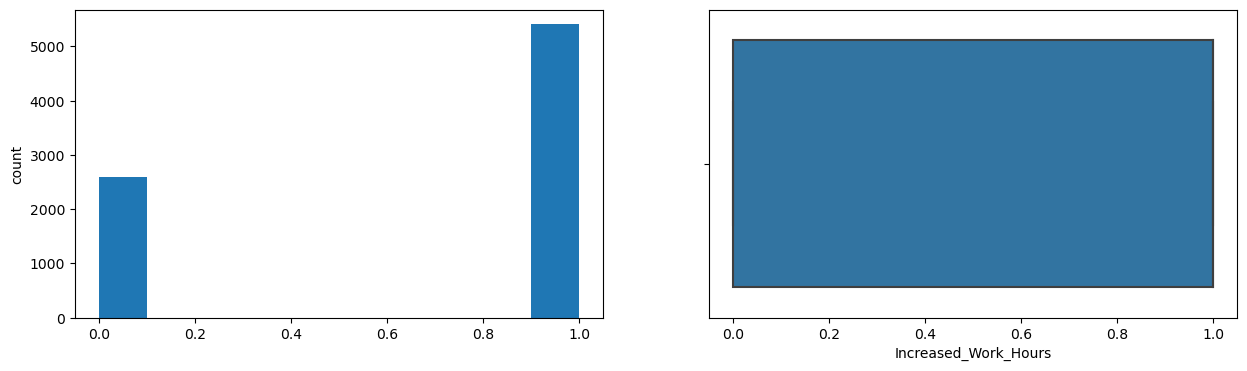

Work_From_Home
Skew : -1.5


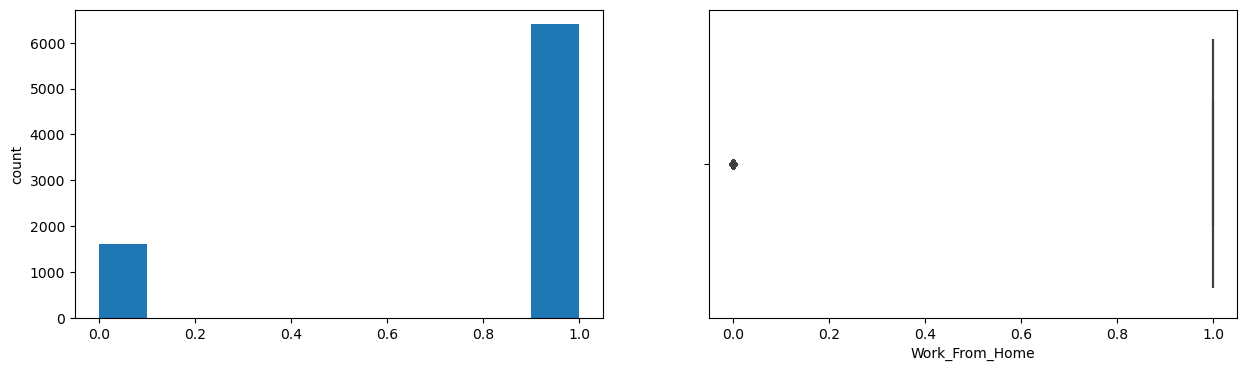

Hours_Worked_Per_Day
Skew : 0.02


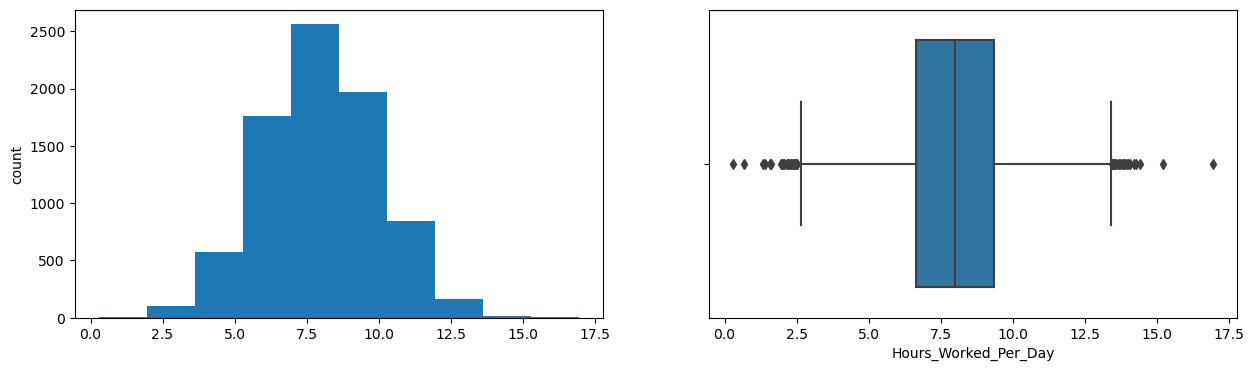

Meetings_Per_Day
Skew : -0.01


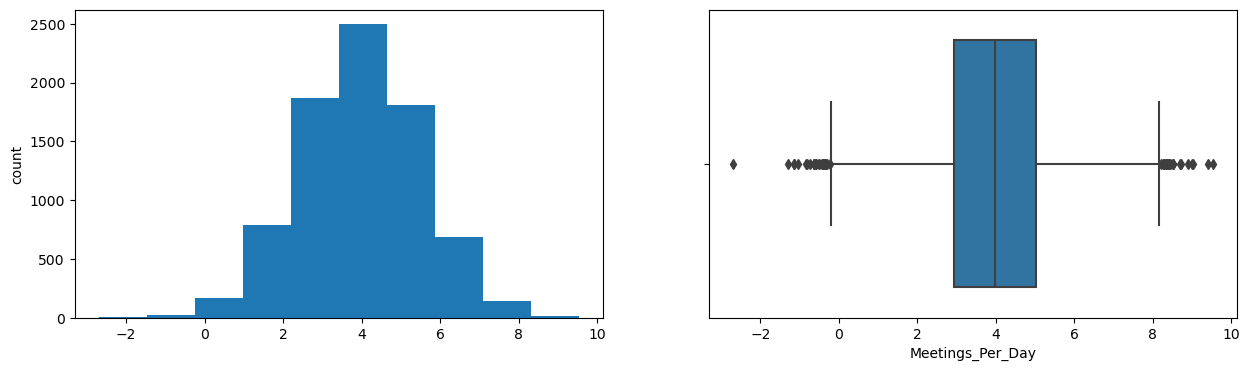

Productivity_Change
Skew : -0.02


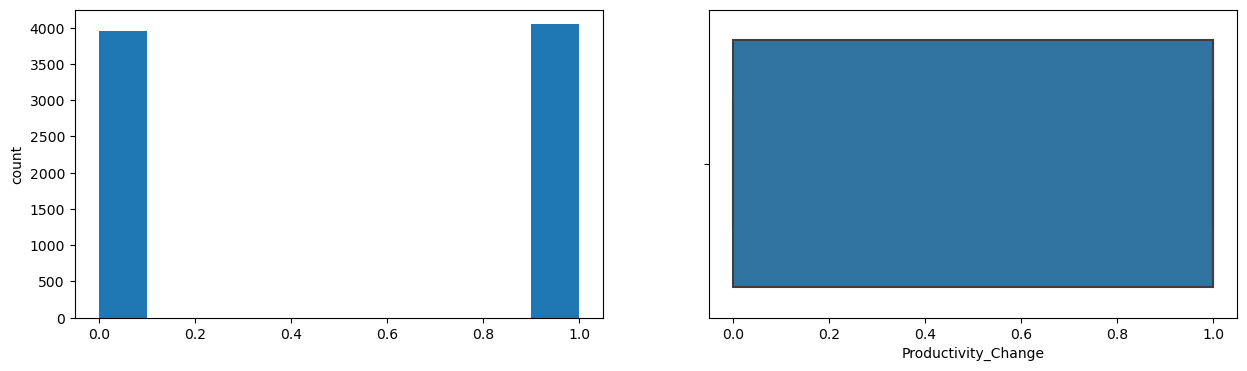

Health_Issue
Skew : 0.87


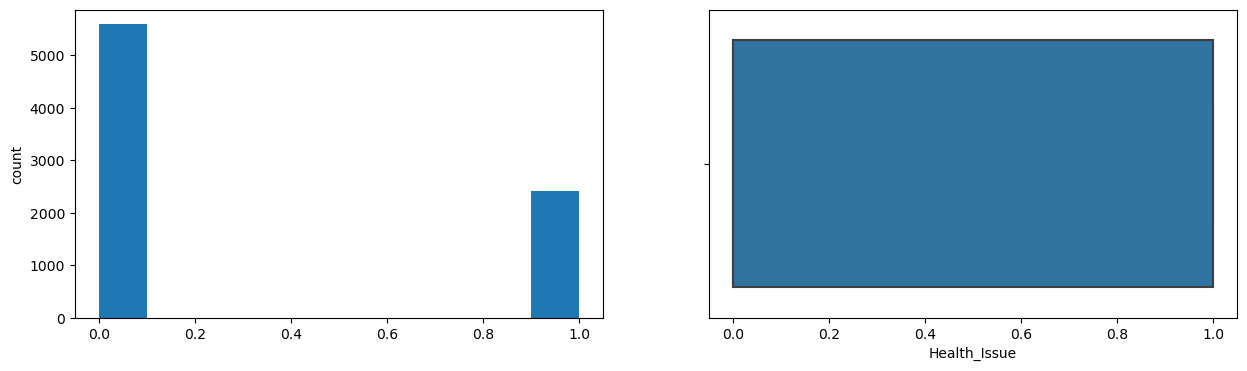

Job_Security
Skew : 0.41


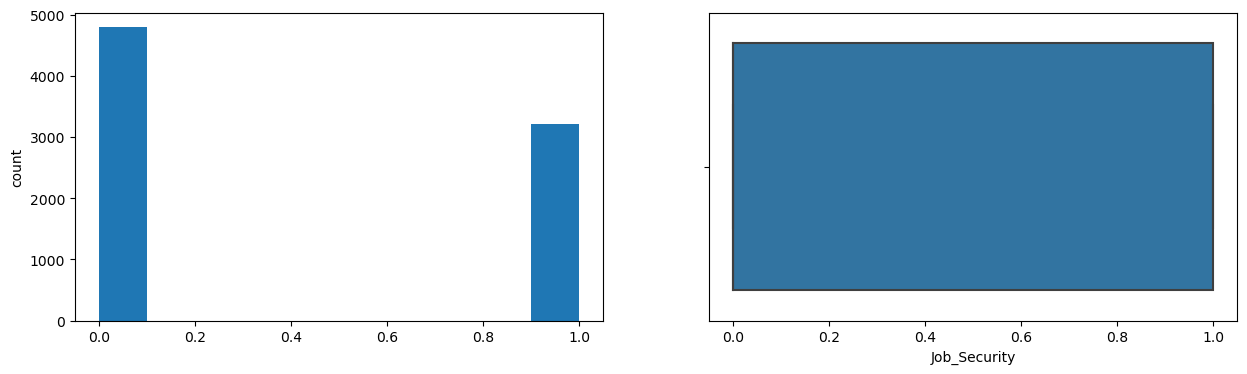

Childcare_Responsibilities
Skew : 0.42


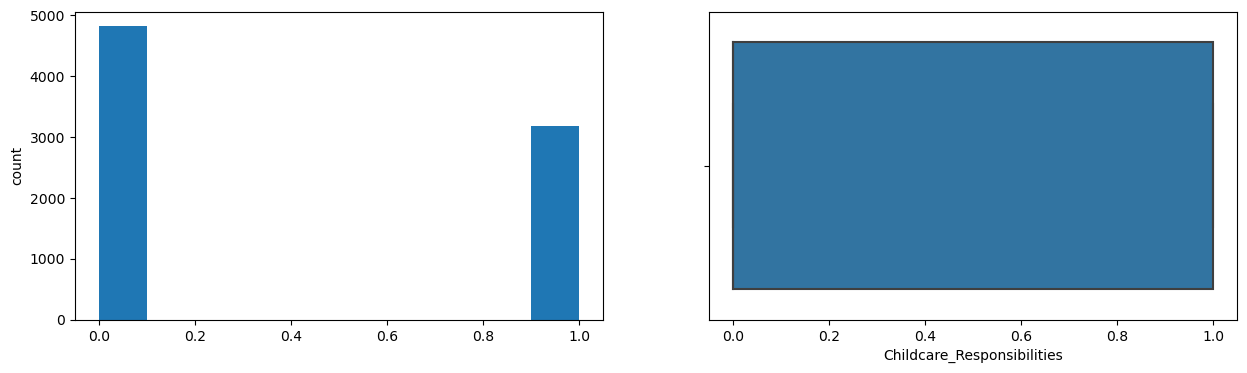

Commuting_Changes
Skew : -0.02


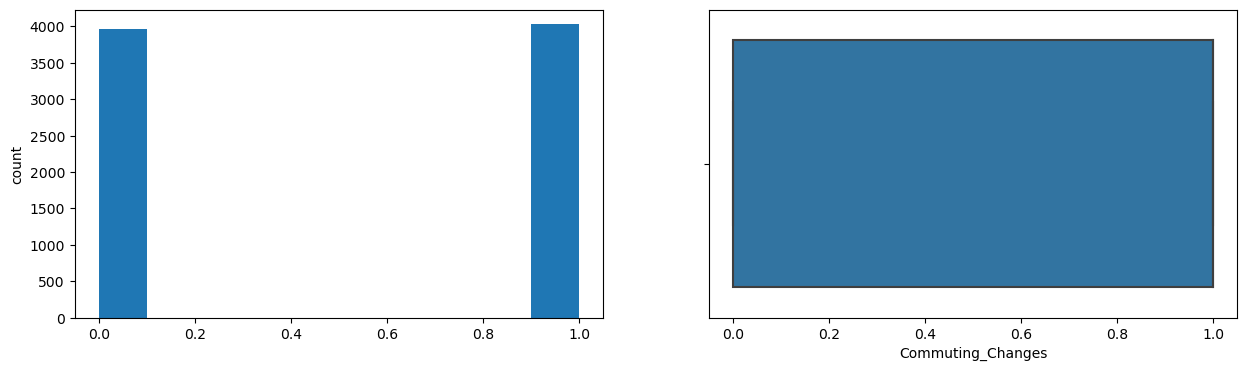

Technology_Adaptation
Skew : -0.43


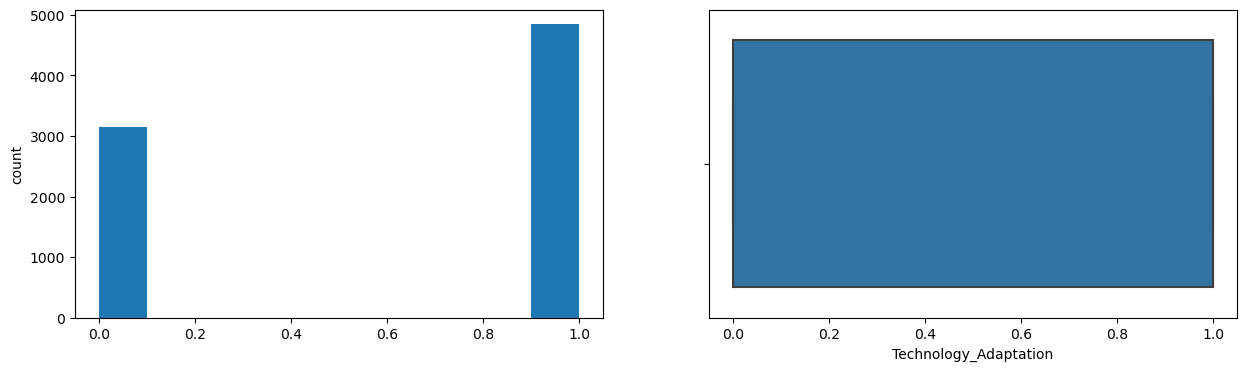

Salary_Changes
Skew : 1.55


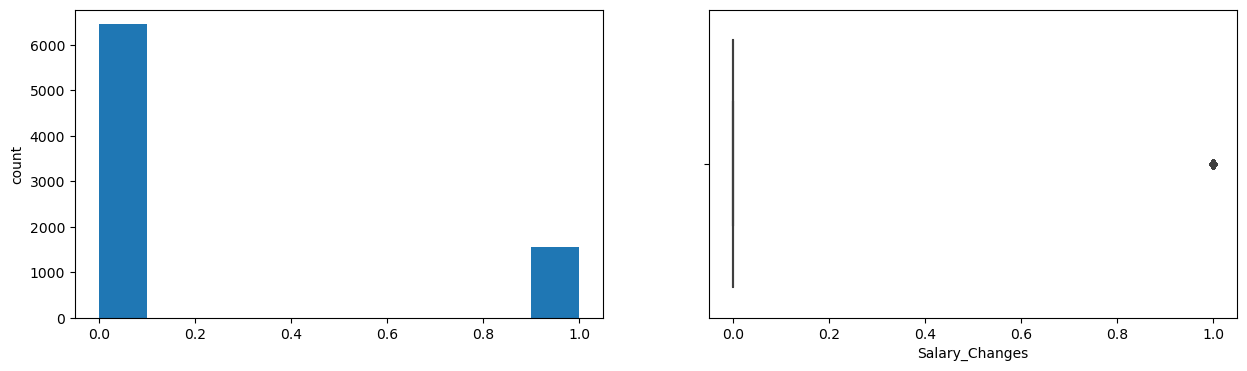

Team_Collaboration_Challenges
Skew : -0.87


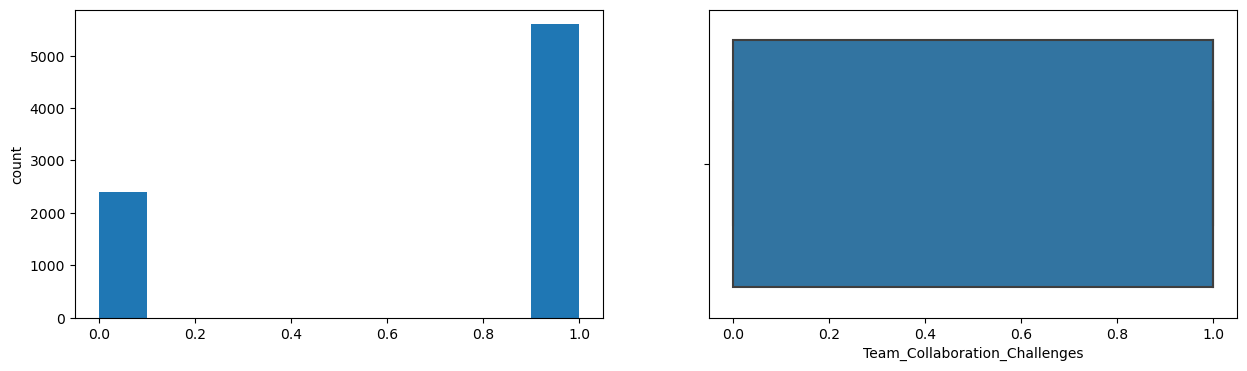

Affected_by_Covid
Skew : 0.0


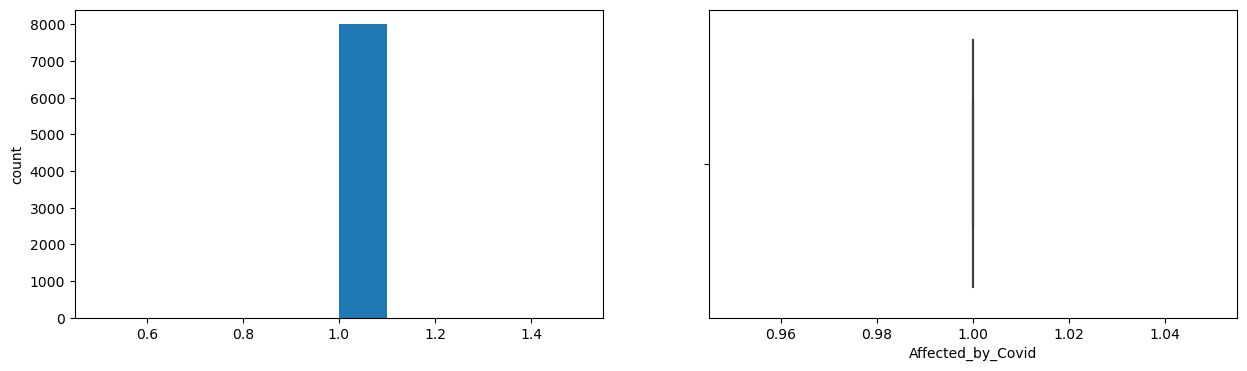

In [10]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

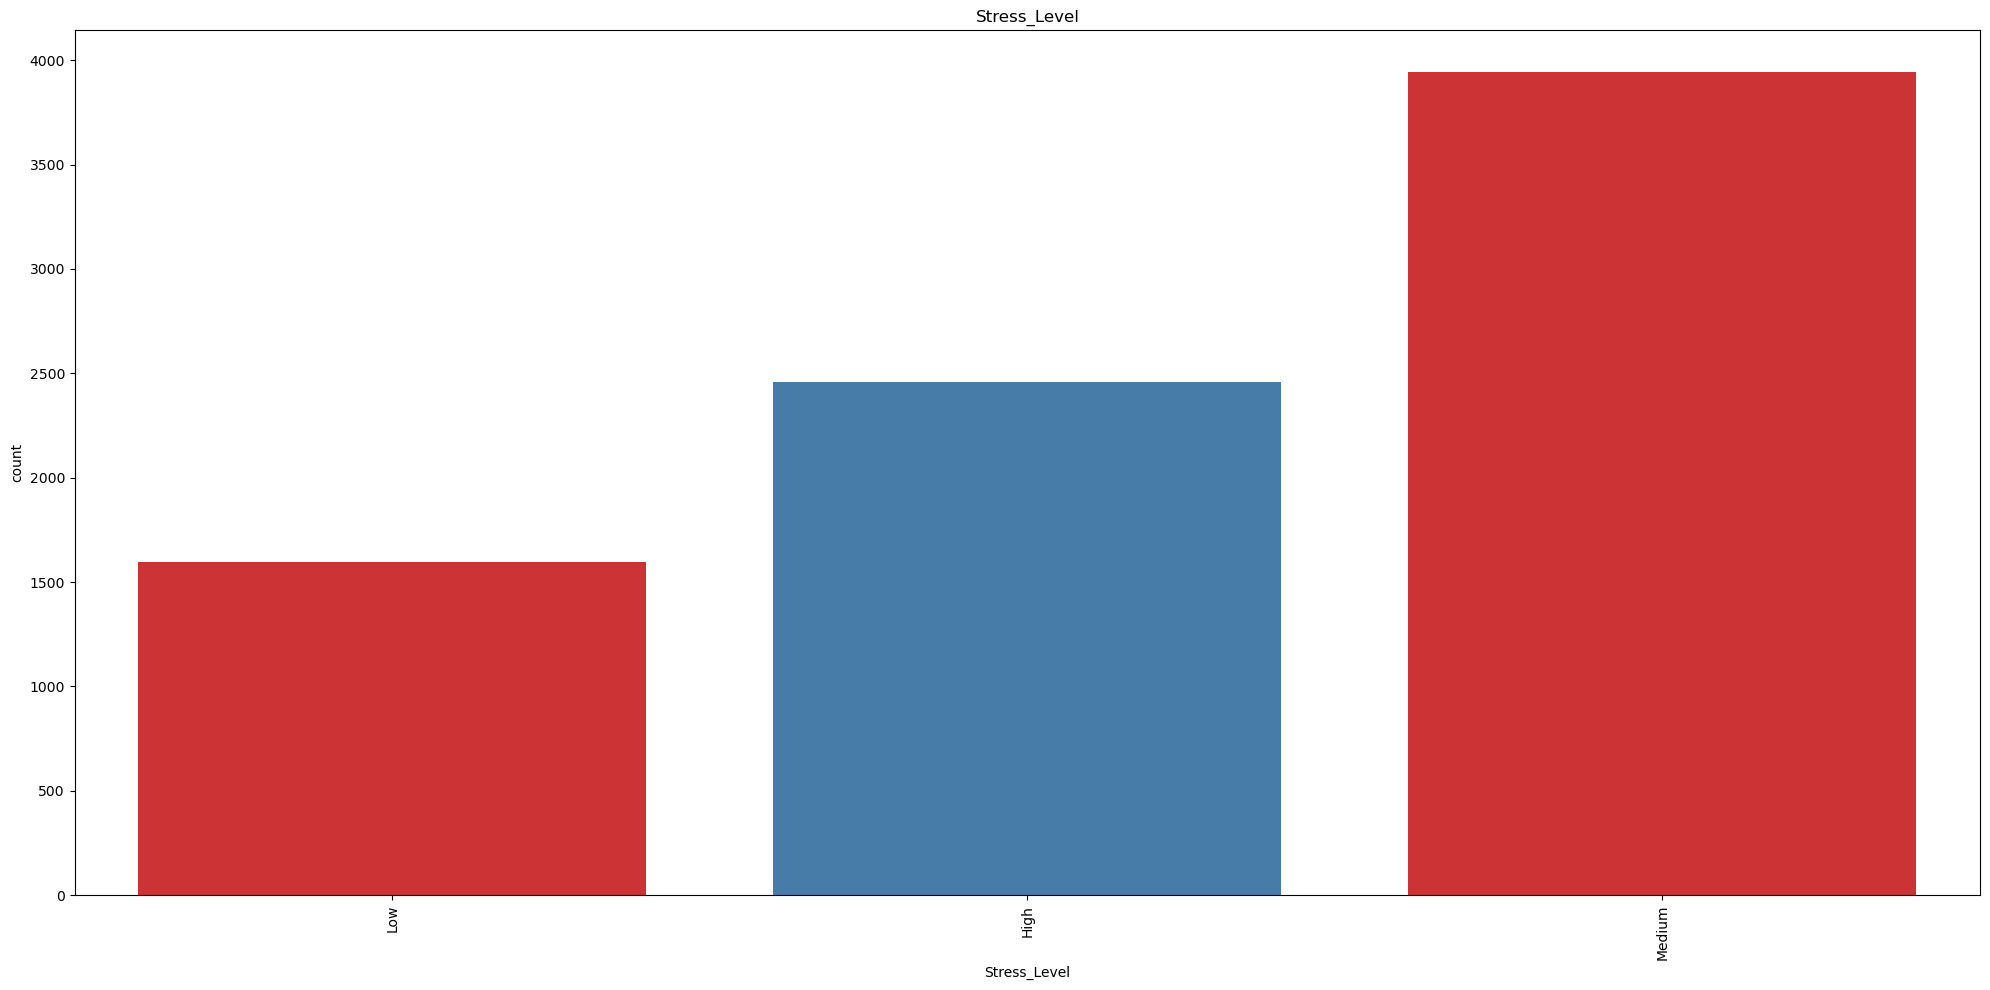

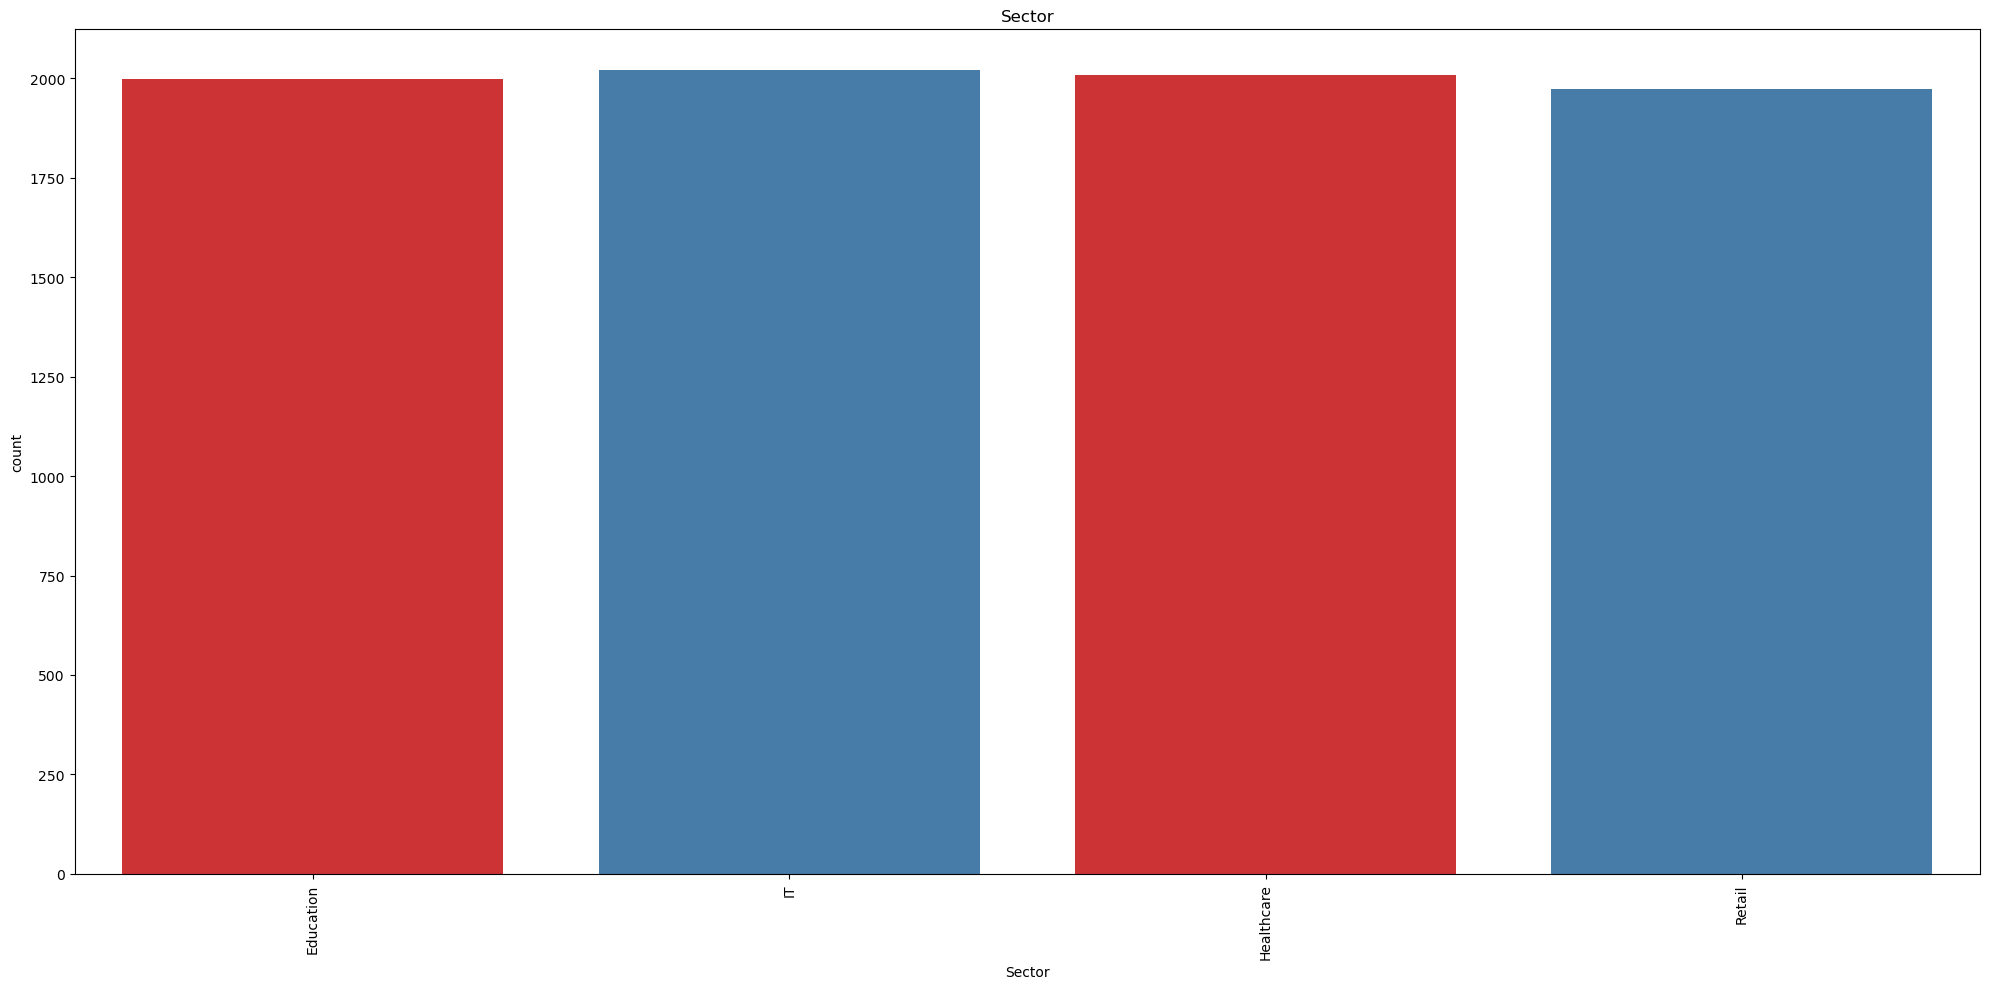

In [11]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    if(column != 'Nama'):
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column, palette=color_palette)
        plt.xticks(rotation=90)
        plt.title(column)
        plt.tight_layout()
        plt.show()

In [12]:
# Memilih fitur numerik dan kolom target untuk pairplot
# sns.pairplot(df[num_cols], hue='Salary_Changes')

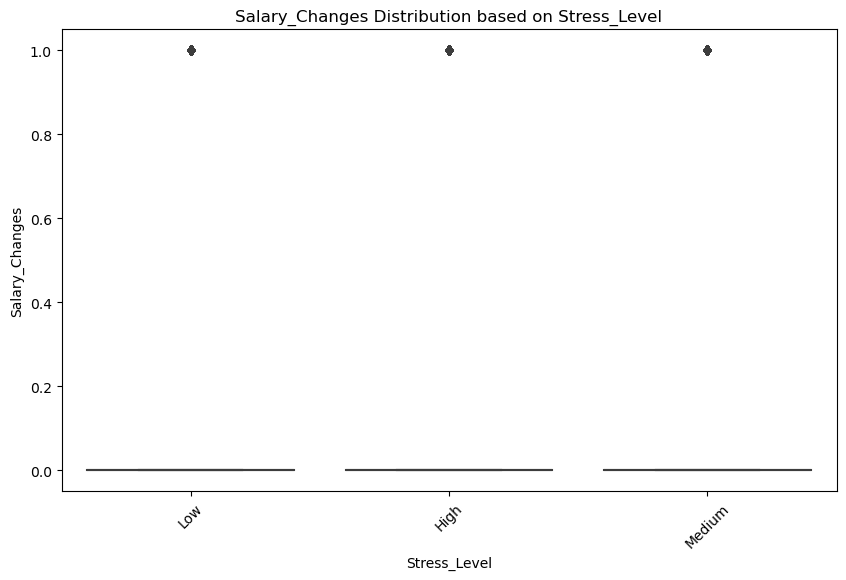

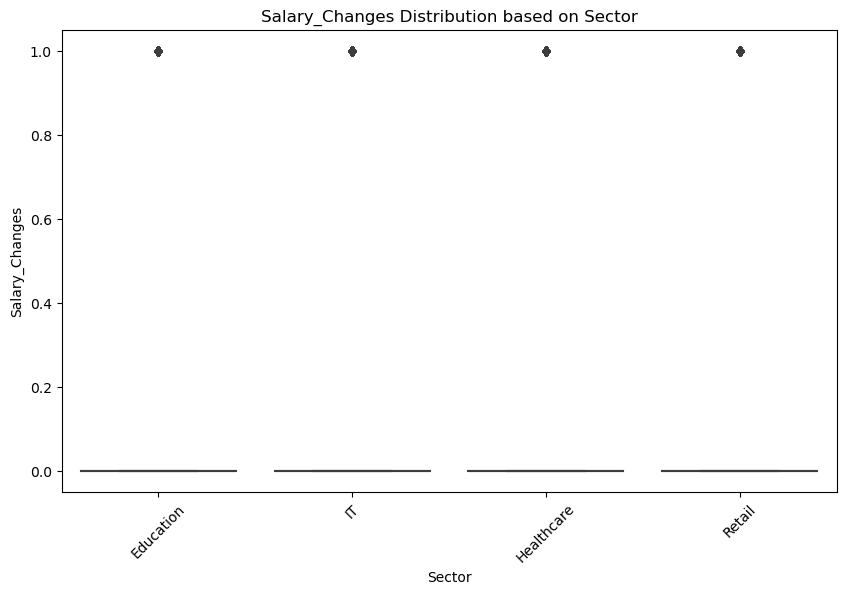

In [13]:


# Membuat box plot untuk melihat distribusi Nilai_Ujian berdasarkan setiap fitur kategorikal
for col in cat_cols:
    if(col != 'Nama'):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y='Salary_Changes')
        plt.title(f'Salary_Changes Distribution based on {col}')
        plt.xticks(rotation=45)
        plt.show()

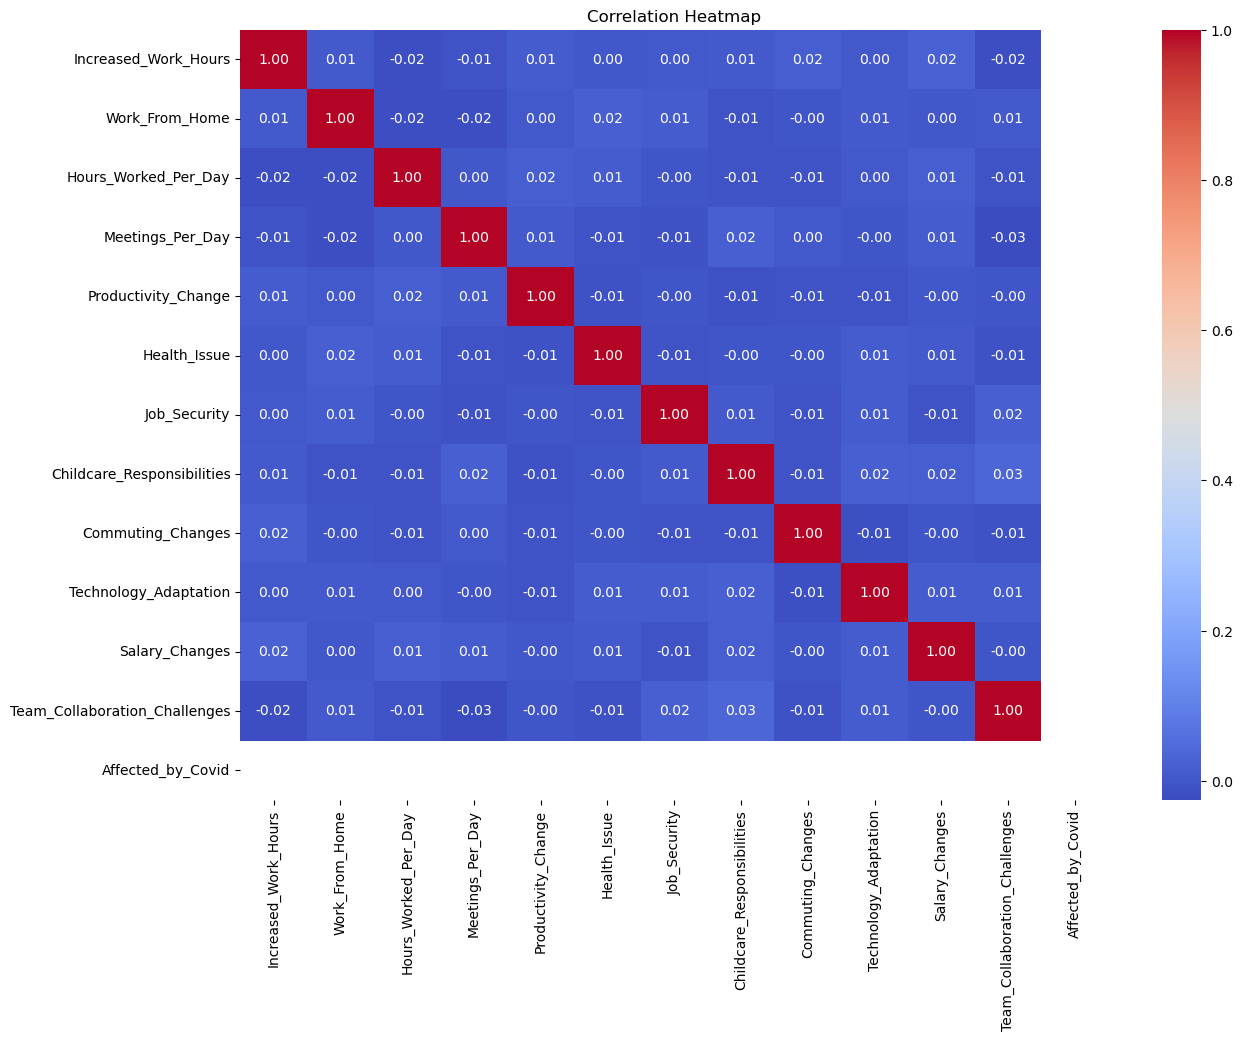

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Data Pre-Processing

In [15]:
df[df['Meetings_Per_Day'] < 0].count()

Increased_Work_Hours             39
Work_From_Home                   39
Hours_Worked_Per_Day             39
Meetings_Per_Day                 39
Productivity_Change              39
Stress_Level                     39
Health_Issue                     39
Job_Security                     39
Childcare_Responsibilities       39
Commuting_Changes                39
Technology_Adaptation            39
Salary_Changes                   39
Team_Collaboration_Challenges    39
Sector                           39
Affected_by_Covid                39
dtype: int64

In [16]:
mean_value = df.loc[df['Meetings_Per_Day'] >= 0, 'Meetings_Per_Day'].mean()

# Mengganti nilai 'Meetings_Per_Day' yang kurang dari 0 dengan nilai rata-rata yang telah dihitung
df.loc[df['Meetings_Per_Day'] < 0, 'Meetings_Per_Day'] = 0

In [17]:
df[df['Meetings_Per_Day'] < 0].count()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
Affected_by_Covid                0
dtype: int64

##### Handling Class Imbalance

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preProcessing(df: pd.DataFrame, mode="train"):
    # Removing Unimportant Column
    df.drop(columns=['Work_From_Home','Productivity_Change','Affected_by_Covid','Sector','Commuting_Changes','Team_Collaboration_Challenges'],axis=1,inplace=True)
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    # Filling NaN values for categorical columns with mode
    # for col in cat_cols:
    #     mode_value = df[col].mode()[0]
    #     df[col].fillna(mode_value, inplace=True)

    # Filling NaN values for numerical columns with rounded mean
    # for col in num_cols:
    #     mean_value = df[col].mean()
    #     mean_value_rounded = round(mean_value)
    #     df[col].fillna(mean_value_rounded, inplace=True)
        
    df_encoded = df.copy()


    # Encoding categorical columns
    label_encoder = LabelEncoder()
    for col in cat_cols:
        if col != 'id':
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        
    # Standardizing numerical columns
    scaler = MinMaxScaler()
    df_encoded_scaled = df_encoded.copy()
    
    if mode == 'train':
        numeric_cols = df_encoded_scaled.drop(columns=['Salary_Changes']).select_dtypes(include=['float64', 'int64', 'int32']).columns
    else:
        numeric_cols = df_encoded_scaled.drop(columns=['id']).select_dtypes(include=['float64', 'int64', 'int32']).columns

    df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    # Rounding scaled values to 2 decimal places
    df_encoded_scaled[numeric_cols] = df_encoded_scaled[numeric_cols].round(2)
    # Applying log transformation on scaled numerical columns (adding 1 to avoid log(0))
    # df_encoded_scaled[numeric_cols] = np.log1p(df_encoded_scaled[numeric_cols])

    # Rounding transformed values to 2 decimal places
    df_encoded_scaled[numeric_cols] = df_encoded_scaled[numeric_cols].round(2)

    return df_encoded_scaled


In [19]:
df_train_encoded_scaled= preProcessing(df)

In [20]:
# from imblearn.over_sampling import ADASYN
# from collections import Counter

# # Memisahkan fitur dan target pada df_train_encoded_scaled
# X = df_train_encoded_scaled.drop('Salary_Changes', axis=1)
# y = df_train_encoded_scaled['Salary_Changes']

# # Inisialisasi ADASYN untuk oversampling
# adasyn = ADASYN(random_state=42)

# # Fit dan resampling data
# X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# # Menampilkan distribusi dataset sebelum dan sesudah resampling
# print('Original dataset shape:', Counter(y))
# print('Resampled dataset shape:', Counter(y_adasyn))

# # X_adasyn dan y_adasyn dapat digunakan untuk training model


In [21]:
df_test_encoded_scaled = preProcessing(df_test_predict,mode='test')

In [22]:
df_train_encoded_scaled.head()

,Increased_Work_Hours,Hours_Worked_Per_Day,Meetings_Per_Day,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Technology_Adaptation,Salary_Changes
0,1.0,0.50,0.50,0.5,0.0,0.0,1.0,1.0,0
1,0.0,0.49,0.61,0.0,0.0,1.0,0.0,1.0,0
2,1.0,0.45,0.53,0.0,1.0,0.0,1.0,1.0,0
3,0.0,0.38,0.22,1.0,1.0,1.0,0.0,0.0,1
4,0.0,0.56,0.33,1.0,0.0,0.0,1.0,1.0,0


In [23]:
df_test_encoded_scaled.head()

,id,Increased_Work_Hours,Hours_Worked_Per_Day,Meetings_Per_Day,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Technology_Adaptation
0,0,1.0,0.28,0.58,1.0,0.0,0.0,0.0,0.0
1,1,1.0,0.40,0.36,1.0,0.0,1.0,1.0,1.0
2,2,1.0,0.59,0.66,1.0,0.0,0.0,0.0,1.0
3,3,0.0,0.35,0.50,1.0,1.0,0.0,0.0,1.0
4,4,1.0,0.52,0.44,1.0,1.0,0.0,0.0,1.0


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    BaggingClassifier
)
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA  # Import PCA

def train_and_predict(df_train, df_test, target_column='Salary_Changes', n_components=0.95):
    # Memisahkan fitur dan target
    X = df_train.drop(columns=[target_column], axis=1)  # Pastikan untuk mengambil fitur dari df_train
    y = df_train[target_column]

    # Membagi data menjadi data latih dan data uji
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi PCA untuk reduksi dimensi
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)  # Fitting dan transformasi pada data latih
    X_val_pca = pca.transform(X_val)  # Transformasi data validasi dengan komponen yang sama

    # Inisialisasi model ensemble
    bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=10,
        random_state=42
    )

    boosting_models = {
        'XGBoost': XGBClassifier(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'AdaBoost': AdaBoostClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'LightGBM': lgb.LGBMClassifier()
    }

    # Membuat ensemble model Stacking
    stacking_model = StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier()),
            ('catboost', CatBoostClassifier(verbose=0)),
            ('rf', RandomForestClassifier()),
            ('lgb', lgb.LGBMClassifier())
        ],
        final_estimator=LogisticRegression(),
        cv=5
    )

    # Menambahkan semua model ke dictionary
    models = {
        # 'Bagging': bagging_model,
        # 'Random Forest': RandomForestClassifier(),
        'Stacking': stacking_model
    }
    models.update(boosting_models)

    # Melatih dan mengevaluasi model
    results = {}

    for model_name, model in models.items():
        model.fit(X_train_pca, y_train)  # Gunakan X_train_pca untuk pelatihan
        y_pred_val = model.predict(X_val_pca)  # Gunakan X_val_pca untuk evaluasi
        val_accuracy = accuracy_score(y_val, y_pred_val)
        val_f1 = f1_score(y_val, y_pred_val)

        results[model_name] = {
            'Validation Accuracy': val_accuracy,
            'Validation F1 Score': val_f1
        }

    # Menampilkan hasil evaluasi
    results_df = pd.DataFrame(results).T
    print(results_df)

    # Memilih model terbaik berdasarkan F1 Score
    best_model_overall = max(results, key=lambda x: results[x]['Validation F1 Score'])
    best_final_model = models[best_model_overall]
    best_final_model.fit(X_train_pca, y_train)  # Melatih model terbaik pada data latih yang sudah melalui PCA
    y_pred_test = best_final_model.predict(pca.transform(df_test.drop(columns=['id'])))  # Gunakan PCA untuk data uji

    # Membuat DataFrame untuk hasil prediksi
    submission_df = pd.DataFrame({
        'id': df_test['id'],
        'Salary_Changes': y_pred_test  # Hasil prediksi biner
    })

    # Mengembalikan DataFrame hasil prediksi
    return submission_df

# Contoh pemanggilan fungsi
# df_train_encoded_scaled = ... # DataFrame pelatihan Anda
# df_test_encoded_scaled = ...  # DataFrame pengujian Anda
# submission_df = train_and_predict(df_train_encoded_scaled, df_test_encoded_scaled)
# submission_df.to_csv('submission.csv', index=False)


In [25]:
submission_df = train_and_predict(df_train_encoded_scaled,df_test_encoded_scaled)

[LightGBM] [Info] Number of positive: 1249, number of negative: 5151
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.195156 -> initscore=-1.416848
[LightGBM] [Info] Start training from score -1.416848
[LightGBM] [Info] Number of positive: 1000, number of negative: 4120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.195312 -> initscore=-1.415853
[LightGBM]

In [26]:

submission_df.head()

,id,Salary_Changes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [27]:
submission_df.to_csv('submission.csv', index=False)